In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

def sweep(mag,beta):
    J=-1    
    for i in range(0,L,1):
        for j in range(0,L,1):
            m_c=mag[i][j]
            D_E=(-2)*J*(m_c)*surr_spin(i,j,mag)
            #Metropolis function
            W=np.exp(-beta*D_E)
            a=np.random.rand()
            if(a<W):
                mag[i][j]=-m_c

            else:
                mag[i][j]=m_c

    return(mag)

def surr_spin(i,j,mag):
    
        s=mag[i%L][(j+1)%L]+mag[i%L][(j-1)%L]+mag[(i+1)%L][j%L]+mag[(i-1)%L][j%L]
        return(s)
            


def sweep_m(mag,beta):
    J=1
    for k in range(0,N**2,1):
        i=np.random.randint(1,L)
        j=np.random.randint(1,L)
        m_c=mag[i][j]
        D_E=(+2)*J*(m_c)*surr_spin(i,j)
        #Metropolis function
        W=np.exp(-beta*D_E)
        a=np.random.rand()
        if(a<W):
             mag[i][j]=-m_c

        else:
            mag[i][j]=m_c

    return(mag)

def surr_spin(i,j):
    
        s=mag[i%L][(j+1)%L]+mag[i%L][(j-1)%L]+mag[(i+1)%L][j%L]+mag[(i-1)%L][j%L]
        return(s)
            

[-0.99333333  0.98222222 -0.97777778  0.96444444 -0.95111111  0.91777778
 -0.90888889  0.90888889 -0.90222222  0.89333333 -0.87555556  0.86444444
 -0.84666667  0.83777778 -0.82666667  0.81555556 -0.8         0.79333333
 -0.76888889  0.76       -0.74666667  0.72444444 -0.72666667  0.71111111
 -0.69555556  0.67777778 -0.67333333  0.66222222 -0.64        0.63111111
 -0.61777778  0.59777778 -0.58        0.57555556 -0.55111111  0.53333333
 -0.52444444  0.52       -0.51111111  0.49555556 -0.49111111  0.47555556
 -0.46666667  0.45555556 -0.44        0.42666667 -0.43111111  0.42222222
 -0.41111111  0.40888889 -0.40222222  0.38888889 -0.37777778  0.38
 -0.36        0.36888889 -0.37333333  0.36444444 -0.36        0.34666667
 -0.33555556  0.32666667 -0.29555556  0.30222222 -0.31333333  0.31555556
 -0.28666667  0.28666667 -0.28888889  0.27555556 -0.26222222  0.26888889
 -0.26444444  0.26888889 -0.26222222  0.27333333 -0.25111111  0.24666667
 -0.26        0.27111111 -0.27111111  0.27555556 -0.25555

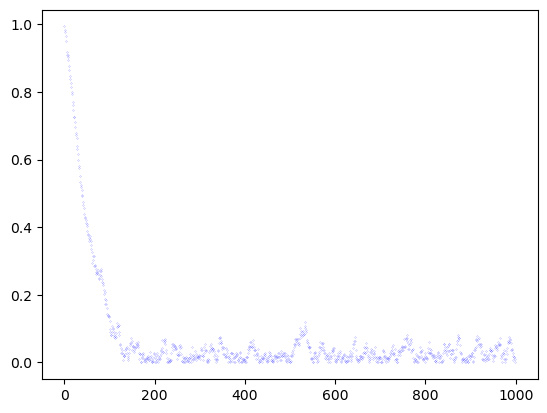

In [12]:
#Length of the lattice 
L=30
# Number of lattice points
N=L*L
mag=np.zeros((L,L))
for i in range(0,L,1):
    for j in range(0,L,1):
        mag[i][j]=+1

#Here starts Monte carlo sweep
beta =0.01    #fixed temperature
N_mc=1000
mag_n=np.zeros((L,L,N_mc))
m_t=np.zeros(N_mc)    #array to store total magnetisation after each MCS
mag_n=mag    # to start with mag_n is all down spins 
for i in range(0,N_mc,1):     #total number of monte carlo sweeps
    
    mag=sweep(mag,beta)    #for each MCS calculating the modified config of magnetic moments
   # mag_n[0][0][i]=mag
    m_t[i]=np.sum(mag)/N
        
        
t=np.array(range(0,N_mc,1))        
plt.plot(t,(np.abs(m_t)),'bo',ms=0.1) 
print (m_t)


Average magnetization per spin over all MCS: -0.00043456790123456437
Standard deviation about mean 0.043456790123450606


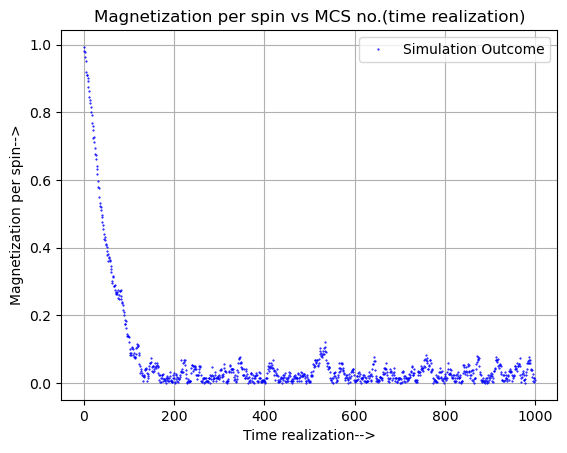

In [13]:
print('Average magnetization per spin over all MCS:',np.sum(m_t)/N)
print('Standard deviation about mean',np.sqrt(np.sum(m_t-(np.sum(m_t)/N))**2))
plt.plot(t,np.abs(m_t),'bo',ms=0.5)


plt.xlabel('Time realization-->')
plt.ylabel('Magnetization per spin-->')
plt.grid()
plt.legend(['Simulation Outcome'])
plt.title('Magnetization per spin vs MCS no.(time realization)')
plt.savefig('MagTime.png')

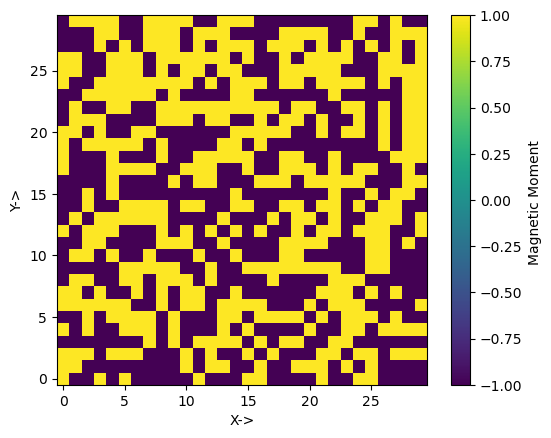

<Figure size 640x480 with 0 Axes>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation


# Initialize the lattice shape and time steps
L = 30 # lattice size
num_frames = 50  # Number of frames in the animation

# Generate random lattice data for each frame 
data = [mag for _ in range(num_frames)]

# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the plot with the first frame
plot = ax.imshow(data[0], cmap='viridis', interpolation='nearest', origin='lower')

# Add a colorbar
cbar = fig.colorbar(plot, ax=ax)
cbar.set_label('Magnetic Moment ')

# Set axis labels
ax.set_xlabel('X->')
ax.set_ylabel('Y->')



# Function to update the plot for each frame
def update_plot(frame):
    plot.set_data(data[frame])
    ax.set_title('Frame {}'.format(frame))

# Create the animation
ani = animation.FuncAnimation(fig, update_plot, frames=num_frames, interval=50)

# Show the animation
plt.show()
plt.savefig('MagTime_con.png')

In [ ]:
#Length of the lattice 
L=20
# Number of lattice points
N=L*L
mag=np.zeros((L,L))
for i in range(0,L,1):
    for j in range(0,L,1):
        mag[i][j]=-1

#Here starts Monte carlo sweep
beta =np.linspace(0.025,1,1000)    #variable temperature
d=np.zeros(np.size(beta))             #array to store magnetisation
N_mc=N
m_t=np.zeros(N_mc)    #array to store total magnetisation after each MCS
mag_n=mag 
cc=0
for j in beta:
    
    for i in range(0,N_mc,1):     #total number of monte carlo sweeps
    
        mag=sweep(mag,j)    #for each MCS calculating the modified config of magnetic moments
    #mag_n[i]=mag
        #m_t[i]=np.sum(mag)
    d[cc]=np.sum(mag)/N
    cc=cc+1
        
        #t=np.array(range(0,N_mc,1))        
    #plt.plot(t,np.abs(m_t),'-',ms=0.1) 
    #plt.legend([r'$\beta$=0.0001',r'$\beta$=0.1',r'$\beta$=10'])
    #print (m_t)
#plt.plot(1/beta,d)    
print(d)


In [ ]:

plt.plot(1/beta,np.abs(d),'*')
plt.xlabel('Temperature($Jk_b^{-1}$)-->')
plt.ylabel('Magnetization per spin-->')
plt.grid()
plt.legend(['Simulation Outcome'])
plt.title('Magnetization per spin vs Temperature->')

In [ ]:
#Length of the lattice 
L=20
# Number of lattice points
N=L*L
mag=np.zeros((L,L))
for i in range(0,L,1):
    for j in range(0,L,1):
        mag[i][j]=-1

#Here starts Monte carlo sweep
    beta =np.linspace(1,0.025,1000)    #variable temperature
d=np.zeros(np.size(beta))             #array to store magnetisation
N_mc=N
m_t=np.zeros(N_mc)    #array to store total magnetisation after each MCS
mag_n=mag 
cc=0
for j in beta:
    
    for i in range(0,N_mc,1):     #total number of monte carlo sweeps
    
        mag=sweep(mag,j)    #for each MCS calculating the modified config of magnetic moments
    #mag_n[i]=mag
        #m_t[i]=np.sum(mag)
    d[cc]=np.sum(mag)/N
    cc=cc+1
        
        #t=np.array(range(0,N_mc,1))        
    #plt.plot(t,np.abs(m_t),'-',ms=0.1) 
    #plt.legend([r'$\beta$=0.0001',r'$\beta$=0.1',r'$\beta$=10'])
    #print (m_t)
#plt.plot(1/beta,d)    
print(d)


In [ ]:
plt.plot(1/beta,np.abs(d))
plt.xlabel('Temperature(K)->')
plt.ylabel('Magnetic moment->')
plt.title('M vs T')
plt.grid()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from PIL import Image


# Initialize the lattice shape and time steps
L = 20  # Example lattice size
num_frames = 50  # Number of frames in the animation
lattice_shape = (L, L)  # Example lattice shape (10x10)

# Example magnetisation data (replace this with your actual data)
mag=mag

# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the quiver plot with the first frame
X, Y = np.meshgrid(np.arange(lattice_shape[0]), np.arange(lattice_shape[1]))
quiver = ax.quiver(X, Y, mag[0], mag[0], scale=20)

# Function to update the plot for each frame
def update_plot(frame):
    ax.clear()
    ax.set_title('Frame {}'.format(frame))
    ax.set_xlim(0, lattice_shape[0])
    ax.set_ylim(0, lattice_shape[1])
    ax.quiver(X, Y, mag[frame], mag[frame], scale=20)

# Create the animation
ani = animation.FuncAnimation(fig, update_plot, frames=num_frames, interval=2)

# Save the animation as a GIF
with Image.new('RGB', tuple(int(x) for x in fig.get_size_inches() * fig.dpi), (255, 255, 255)) as img:
    ani.save('magnetism.gif', writer='pillow', fps=2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function to fit
def model_function(x, T_c):
    B = 0.5  # Fixed value for parameter B
    return np.maximum(T_c - x) ** (-1/2)  # Set negative values to zero

# Generate some sample data
x_data = 1/beta
y_data = d

# Fit the model to the data, fixing parameter B to 0.5
params, covariance = curve_fit(model_function, x_data, y_data, p0=[0.5])

# Extract the parameters
T_c = params[0]

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, model_function(x_data, T_c), color='red', label='Fitted curve')
plt.xlabel('Temperature')
plt.ylabel('Magnetisation')
plt.legend()
plt.show()

print("Fitted parameters:")
print("T_c:", T_c)


In [ ]:
#Length of the lattice 
L=10
# Number of lattice points
N=L*L
mag=np.zeros((L,L))
for i in range(0,L,1):
    for j in range(0,L,1):
        mag[i][j]=-1

#Here starts Monte carlo sweep
beta =[0.1]    #fixed temperature
N_mc=100000000
m_t=np.zeros(N_mc)    #array to store total magnetisation after each MCS
mag_n=mag 
for j in beta:
    mag=mag_n
    for i in range(0,N_mc,1):     #total number of monte carlo sweeps
    
        mag=sweep(mag,j)    #for each MCS calculating the modified config of magnetic moments
    #mag_n[i]=mag
        m_t[i]=np.sum(mag)
        
        
        t=np.array(range(0,N_mc,1))        
    plt.plot(t,np.abs(m_t),'-',ms=0.1) 
    plt.legend([r'$\beta$=0.0001',r'$\beta$=0.1',r'$\beta$=10'])
    plt.xlabel([8000,10000])
   # print (m_t)
    

In [ ]:
#glauber algorithm
def sweep(mag,beta):
    J=1
    for i in range(0,L,1):
        for j in range(0,L,1):
            m_c=mag[i][j]
            D_E=(+2)*J*(m_c)*surr_spin(i,j)
            #Glauber function
            W=(1-np.tanh(beta*D_E*0.5))*(0.5)
            a=np.random.rand()
            if(a<W):
                mag[i][j]=-m_c

            else:
                mag[i][j]=m_c

    return(mag)

def surr_spin(i,j):
    
        s=mag[i%L][(j+1)%L]+mag[i%L][(j-1)%L]+mag[(i+1)%L][j%L]+mag[(i-1)%L][j%L]
        return(s)
            

In [ ]:
#Length of the lattice 
L=10

# Number of lattice points
N=L*L
mag=np.zeros((L,L))
for i in range(0,L,1):
    for j in range(0,L,1):
        mag[i][j]=-1

#Here starts Monte carlo sweep
beta =1   #fixed temperature
N_mc=10000
mag_n=np.zeros((L,L,N_mc))
m_t=np.zeros(N_mc)    #array to store total magnetisation after each MCS
mag_n=mag    # to start with mag_n is all down spins 
for i in range(0,N_mc,1):     #total number of monte carlo sweeps
    
    mag=sweep(mag,beta)    #for each MCS calculating the modified config of magnetic moments
   # mag_n[0][0][i]=mag
    m_t[i]=np.sum(mag)/N
        
        
t=np.array(range(0,N_mc,1))        
plt.plot(t,(m_t),'bo',ms=0.1) 
print (m_t)

In [ ]:
print('Average magnetization per spin over all MCS:',np.sum(m_t)/N)
print('Standard deviation about mean',np.sqrt(np.sum(m_t-(np.sum(m_t)/N))**2))
plt.plot(t,(m_t),'bo',ms=0.5)


plt.xlabel('Time realization-->')
plt.ylabel('Magnetization per spin-->')
plt.grid()
plt.legend(['Simulation Outcome'])
plt.title('Magnetization per spin vs MCS no.(time realization)')

In [109]:

def sweep(mag,beta,J):
    #;B=1
    for i in range(0,L,1):
        for j in range(0,L,1):
            m_c=mag[i][j]
            D_E=(+2)*J*(m_c)*surr_spin(i,j)#+2*B*(m_c)    #change in energy upon possible flipping
            #Metropolis function
            W=np.exp(-beta*D_E)
            a=np.random.rand()
            if(a<W):
                mag[i][j]=-m_c

            else:
                mag[i][j]=m_c

    return(mag)

def surr_spin(i,j):
    
        s=mag[i%L][(j+1)%L]+mag[i%L][(j-1)%L]+mag[(i+1)%L][j%L]+mag[(i-1)%L][j%L]
        return(s)
            

In [110]:
#rough work
N=5
m=np.zeros((N,N))
for i in range(0,N,1):
    if(i%2==0):
        m[i][0]=+1
    else:
        m[i][0]=-1
    t = m[i][0]
    for j in range(0,N,1):
        if(j%2==0):
            m[i][j]=t

        else:
            m[i][j]=-t

print(m)
        

[[ 1. -1.  1. -1.  1.]
 [-1.  1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1.]
 [-1.  1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1.]]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


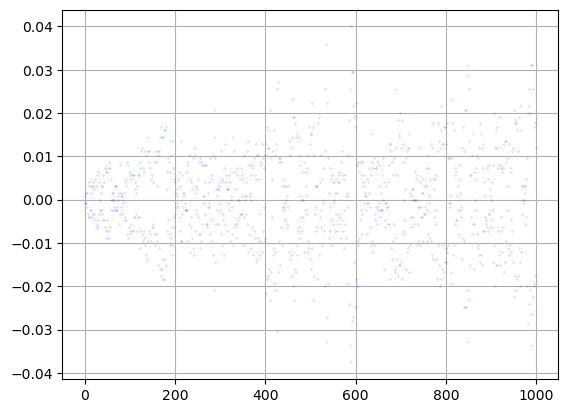

In [154]:
#Length of the lattice    Anti ferromagnet
L=30;J=-1
# Number of lattice points
N=L*L
mag=np.zeros((L,L))
for i in range(0,L,1):
    if(i%2==0):
        mag[i][0]=+1
    else:
        mag[i][0]=-1
    t = mag[i][0]
    for j in range(0,L,1):
        if(j%2==0):
            mag[i][j]=t

        else:
            mag[i][j]=-t
#Here starts Monte carlo sweep
beta =0.01    #fixed temperature
N_mc=1000
mag_n=np.zeros((L,L,N_mc))
m_t1=np.zeros(N_mc)    #array to store total magnetisation after each MCS
mag_n=mag    # to start with mag_n is all down spins 
for i in range(0,N_mc,1):     #total number of monte carlo sweeps
    
    mag=sweep(mag,beta,J)    #for each MCS calculating the modified config of magnetic moments
   # mag_n[0][0][i]=mag
    m_t1[i]=np.sum(mag)/N
        
        
t=np.array(range(0,N_mc,1))        
plt.plot(t,(m_t1),'bo',ms=0.1) 
plt.grid()
print (m_t)

[ 9.936e-01 -9.904e-01  9.896e-01 -9.848e-01  9.800e-01 -9.792e-01
  9.712e-01 -9.640e-01  9.616e-01 -9.608e-01  9.592e-01 -9.552e-01
  9.496e-01 -9.448e-01  9.400e-01 -9.360e-01  9.312e-01 -9.256e-01
  9.248e-01 -9.200e-01  9.168e-01 -9.144e-01  9.088e-01 -9.072e-01
  9.040e-01 -8.976e-01  8.952e-01 -8.888e-01  8.872e-01 -8.824e-01
  8.784e-01 -8.736e-01  8.720e-01 -8.696e-01  8.664e-01 -8.616e-01
  8.560e-01 -8.536e-01  8.472e-01 -8.440e-01  8.416e-01 -8.360e-01
  8.312e-01 -8.248e-01  8.232e-01 -8.192e-01  8.192e-01 -8.144e-01
  8.088e-01 -8.072e-01  8.024e-01 -8.016e-01  7.992e-01 -7.920e-01
  7.896e-01 -7.848e-01  7.776e-01 -7.736e-01  7.720e-01 -7.696e-01
  7.680e-01 -7.648e-01  7.624e-01 -7.608e-01  7.544e-01 -7.496e-01
  7.488e-01 -7.504e-01  7.504e-01 -7.464e-01  7.416e-01 -7.416e-01
  7.400e-01 -7.392e-01  7.416e-01 -7.416e-01  7.400e-01 -7.376e-01
  7.328e-01 -7.304e-01  7.280e-01 -7.280e-01  7.240e-01 -7.216e-01
  7.184e-01 -7.160e-01  7.128e-01 -7.048e-01  6.992e-01 -6.904

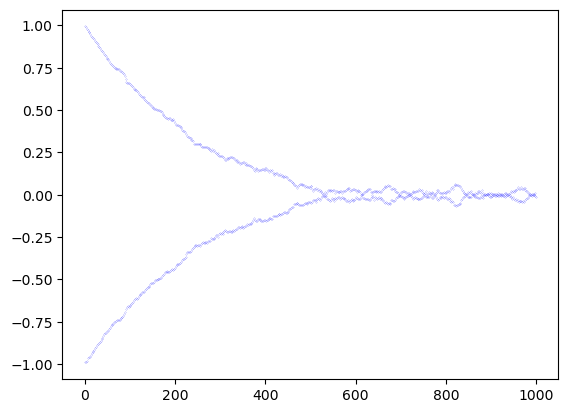

In [155]:
#Length of the lattice 
L=50;J=+1
# Number of lattice points
N=L*L
mag=np.zeros((L,L))
for i in range(0,L,1):
    for j in range(0,L,1):
        mag[i][j]=-1

#Here starts Monte carlo sweep
beta =0.01   #fixed temperature
N_mc=1000
mag_n=np.zeros((L,L,N_mc))
m_t=np.zeros(N_mc)    #array to store total magnetisation after each MCS
mag_n=mag    # to start with mag_n is all down spins 
for i in range(0,N_mc,1):     #total number of monte carlo sweeps
    
    mag=sweep(mag,beta,J)    #for each MCS calculating the modified config of magnetic moments
   # mag_n[0][0][i]=mag
    m_t[i]=np.sum(mag)/N
        
        
t=np.array(range(0,N_mc,1))        
plt.plot(t,(m_t),'bo',ms=0.1) 
print (m_t)

Average magnetization per spin over all MCS: -4.992000000000002e-05
Standard deviation about mean 0.0748800000000001


Text(0.5, 1.0, 'Magnetization per spin vs MCS no.(time realization) at $\\beta$=1')

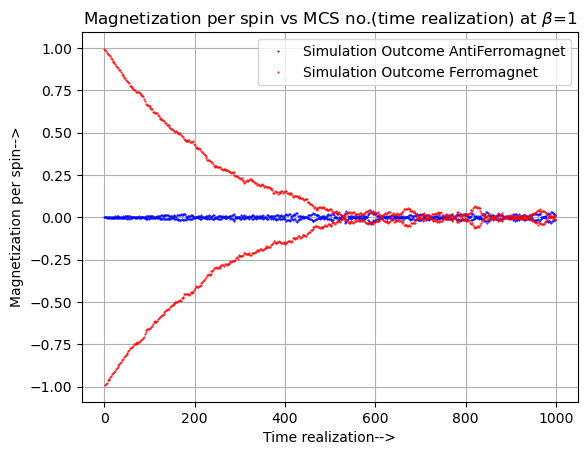

In [156]:
print('Average magnetization per spin over all MCS:',np.sum(m_t1)/N)
print('Standard deviation about mean',np.sqrt(np.sum(m_t1-(np.sum(m_t1)/N))**2))
plt.plot(t,(m_t1),'bo',ms=0.5)
plt.plot(t,m_t,'ro',ms=0.5)

plt.xlabel('Time realization-->')
plt.ylabel('Magnetization per spin-->')
plt.grid()
plt.legend(['Simulation Outcome AntiFerromagnet',r'Simulation Outcome Ferromagnet'])
plt.title(r'Magnetization per spin vs MCS no.(time realization) at $\beta$=1')

In [157]:
#Length of the lattice   #Temperature 
L=10;J=-1
# Number of lattice points
N=L*L
mag=np.zeros((L,L))
for i in range(0,L,1):
    if(i%2==0):
        mag[i][0]=+1
    else:
        mag[i][0]=-1
    t = mag[i][0]
    for j in range(0,L,1):
        if(j%2==0):
            mag[i][j]=t

        else:
            mag[i][j]=-t

#Here starts Monte carlo sweep
beta =np.linspace(1,0.005,1000)    #variable temperature
d=np.zeros(np.size(beta))             #array to store magnetisation
N_mc=N
m_t=np.zeros(N_mc)    #array to store total magnetisation after each MCS
mag_n=mag 
cc=0
for j in beta:
    
    for i in range(0,N_mc,1):     #total number of monte carlo sweeps
    
        mag=sweep(mag,j,J)    #for each MCS calculating the modified config of magnetic moments
    #mag_n[i]=mag
        #m_t[i]=np.sum(mag)
    d[cc]=np.sum(mag)/N
    cc=cc+1
        
        #t=np.array(range(0,N_mc,1))        
    #plt.plot(t,np.abs(m_t),'-',ms=0.1) 
    #plt.legend([r'$\beta$=0.0001',r'$\beta$=0.1',r'$\beta$=10'])
    #print (m_t)
#plt.plot(1/beta,d)    
print(d)


[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.02  0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.02  0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.02  0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.02  0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.02 -0.02  0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.02  0.    0.    0.02  0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.   -0.02  0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.02  0.    0.    0.    0.    0.
  0.   -0.02  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.  

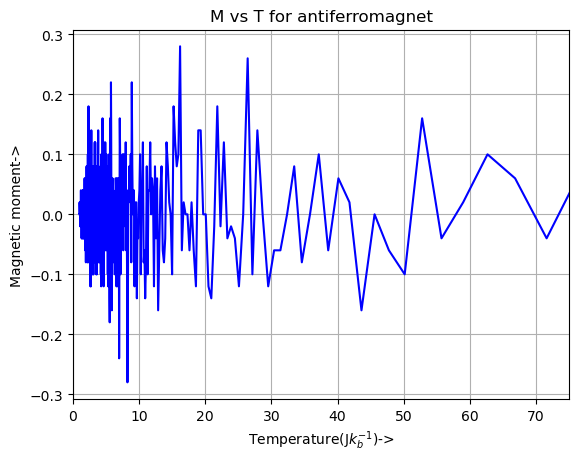

In [153]:
plt.plot(1/beta,d,'b-',ms=0.5,)
plt.xlabel('Temperature(J$k_b^{-1}$)->')
plt.ylabel('Magnetic moment->')
plt.title('M vs T for antiferromagnet')
plt.xlim([0,75])
plt.grid()